# 1. recursion

In [44]:
def recursive_add (x):
    if len(x) == 0:
        return 0
    else:
        return x.pop(0) + recursive_add(x)
    
a = [1,2,3,4,5,6,7,8,9]

In [45]:
recursive_add(a)

45

In [46]:
def recursive_count(x,count):
    if len(x) == 0:
        return count
    else:
        x.pop(0)
        count +=1
        return recursive_count(x, count)  
    
a = [1,2,3,4,5,6,7,8,9]

recursive_count(a,0)

9

## 1.1 quick sort

In [47]:
b = [3,2,5,1,4]

In [48]:
def partition(lst, pivot_index):
    
    less_than = []
    more_than = []
    
    if len(lst)==1:
        return less_than, lst.pop(0), more_than
        
    pivot = lst.pop(pivot_index)
    
    print(pivot)
    
    for item in lst:
        if item < pivot:
            less_than.append(item)
        else:
            more_than.append(item)
    
    return less_than, pivot, more_than
    

In [49]:
def quicksort(lst, pivot_index):
    if len(lst) <= 1:
        return lst
    less_than, pivot, more_than = partition(lst, pivot_index)
    return quicksort(less_than, pivot_index) + [pivot] + quicksort(more_than, pivot_index)
    

In [50]:
quicksort(b,0)

3
2
5


[1, 2, 3, 4, 5]

# 2. Graph 
## 2.1. breadth_first_search 

In [51]:

c = {
    'name':'c',
    'next':[]
}


d = {
    'name':'d',
    'next':[]
}


f = {
    'name':'f',
    'next':[]
}

a = {
    'name':'a',
    'next':['f', 'c']
}

b = {
    'name':'b',
    'next':['c', 'd']
}

s = {
    'name':'s',
    'next':['a', 'b']
}

graph = {
    'a':a,
    'b':b,
    'c':c,
    'd':d,
    'f':f,
    's':s
}

In [52]:
def breadth_first_search(graph, start, target):
    
    #init the queue with the neighbors of the start node
    to_be_searched = [*start['next']]
    
    #init count
    count = 0
    
    #init searched
    searched = []
    
    while len(to_be_searched) > 0 :
        
        #pop the first node from the queue to visit
        current = to_be_searched.pop(0)
        count +=1

        #check if current node has been visited
        if not current in searched: 
            searched = [*searched, current]
            
            #if target found, return
            if graph[current]['name'] == target :
                return current, count, searched

            #otherwise add the neighbors of the current visiting node to the queue
            to_be_searched = [*to_be_searched, *graph[current]['next']]


In [53]:
breadth_first_search(graph, graph['s'], 'f')

('f', 3, ['a', 'b', 'f'])

## 2.2 depth-first-search

In [107]:
graph = {
  'A': ['B', 'C'],
  'B': ['A', 'C', 'D'],
  'C': ['A', 'B', 'D', 'E'],
  'D': ['B', 'C', 'E', 'F'],
  'E': ['C', 'D', 'F'],
  'F': ['D', 'E']
}
graph

{'A': ['B', 'C'],
 'B': ['A', 'C', 'D'],
 'C': ['A', 'B', 'D', 'E'],
 'D': ['B', 'C', 'E', 'F'],
 'E': ['C', 'D', 'F'],
 'F': ['D', 'E']}

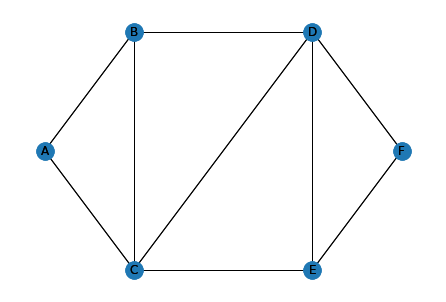

In [122]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
Graph = nx.Graph()
for node in graph:
    Graph.add_nodes_from(node)
    for edge in graph[node]:
        Graph.add_edge(node,edge)
pos = { 'A': [0.00, 0.50], 'B': [0.25, 0.75],
        'C': [0.25, 0.25], 'D': [0.75, 0.75],
        'E': [0.75, 0.25], 'F': [1.00, 0.50]}
nx.draw(Graph, pos, with_labels=True)
nx.draw_networkx(Graph, pos)
plt.show()

In [169]:
def bfs(graph, start, target):
  queue = [start]
  processed = [start]
  path = []
  while queue:
    print(f'queue: {queue}\nprocessed: {processed}')
    vertex = queue.pop(0)
    for candidate in graph[vertex] :
      
      if candidate not in processed :
        queue.append(candidate)
        processed.append(candidate)
        path.append(vertex + '->' + candidate)
        if candidate == target :
          return path     
  return 'Node Not Found'
bfs(graph, 'A', 'F')


queue: ['A']
processed: ['A']
queue: ['B', 'C']
processed: ['A', 'B', 'C']
queue: ['C', 'D']
processed: ['A', 'B', 'C', 'D']
queue: ['D', 'E']
processed: ['A', 'B', 'C', 'D', 'E']


['A->B', 'A->C', 'B->D', 'C->E', 'D->F']

In [172]:
def dfs(graph, start, target):
    stack = [start]
    parents = {start: start}
    path = list()
    while stack:
        print ('Stack is: %s' % stack)
        vertex = stack.pop(-1)
        print ('Processing %s' % vertex)
        for candidate in graph[vertex]:
            if candidate not in parents:
                parents[candidate] = vertex
                stack.append(candidate)
                print ('Adding %s to the stack' % candidate) 
        path.append(parents[vertex]+'->'+vertex)
    return path[1:]

dfs(graph,'A', 'G')

Stack is: ['A']
Processing A
Adding B to the stack
Adding C to the stack
Stack is: ['B', 'C']
Processing C
Adding D to the stack
Adding E to the stack
Stack is: ['B', 'D', 'E']
Processing E
Adding F to the stack
Stack is: ['B', 'D', 'F']
Processing F
Stack is: ['B', 'D']
Processing D
Stack is: ['B']
Processing B


['A->C', 'C->E', 'E->F', 'C->D', 'A->B']

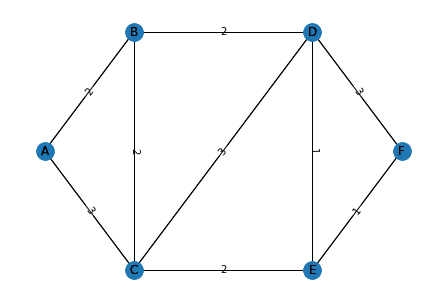

In [48]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
graph = {'A': {'B':2, 'C':3},
         'B': {'A':2, 'C':2, 'D':2},
         'C': {'A':3, 'B':2, 'D':3, 'E':2},
         'D': {'B':2, 'C':3, 'E':1, 'F':3},
         'E': {'C':2, 'D':1, 'F':1},
         'F': {'D':3, 'E':1}}
Graph = nx.Graph()
for node in graph:
    Graph.add_nodes_from(node)
    for edge, weight in graph[node].items():
        Graph.add_edge(node,edge, weight=weight)
pos = { 'A': [0.00, 0.50], 'B': [0.25, 0.75],
        'C': [0.25, 0.25], 'D': [0.75, 0.75],
        'E': [0.75, 0.25], 'F': [1.00, 0.50]}
labels = nx.get_edge_attributes(Graph,'weight')
nx.draw(Graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=labels)
nx.draw_networkx(Graph,pos)
plt.show()

## priority queue base on heapq package

In [44]:
from heapq import heapify, heappop, heappush

''' 
  priority_queue class instantiates a priority queue object for pushing, poping workload with its weight,
  the instance also could be iterated for the items.
'''
class priority_queue():
  
  def __init__(self):
    self.queue = list()
    heapify(self.queue)
    self.index = dict()

  def push(self, priority, workload):
    #print(f'p:{priority}\tload:{workload}')
    if workload in self.index:
      self.queue = [ (p, w) for (p, w) in self.queue if w != workload  ]
      heapify(self.queue)
    heappush(self.queue, (priority, workload))
    self.index[workload] = priority
  
  def pop(self):
    if self.queue:
      return heappop(self.queue)

  def __contains__(self, workload):
    return workload in self.index

  def __len__(self):
    return len(self.queue)

  def __iter__(self):
    return pq_iterator(self.queue)


""" 
  pq_iterator class provides priority queue a iterator each time the __iter__() method of priority queue is called.
"""
class pq_iterator():
  def __init__(self,queue):
    self.queue = queue
    self.index = 0

  def __next__(self):
    if self.index < len(self.queue):
      item = self.queue[self.index]
      self.index += 1
      return item
    raise StopIteration

## Kruskals Minimum Spanning Tree
1. Sort all the edges in non-decreasing order of their weight. 
2. Pick the smallest edge. Check if it forms a cycle with the spanning tree formed so far. If cycle is not formed, include this edge. Else, discard it. 
3. Repeat step#2 until there are (V-1) edges in the spanning tree.

In [70]:
def find_weighted_edges(graph):
  weighted_edges = dict()
  for start in graph.keys():
    for end, weight in graph[start].items():
      if (end, start) not in weighted_edges.keys():
        weighted_edges[(start,end)] = weight
  return weighted_edges

weighted_edges = find_weighted_edges(graph)

In [69]:
# asc_weighted_edges(weighted_edges) returns a priority_queue instance filled with all the weighted_edges.
def asc_weighted_edges(weighted_edges):
  pq = priority_queue()
  for edges, weight in weighted_edges.items():
    pq.push(weight, edges)
  return pq

pq_weighted_edges = asc_weighted_edges(weighted_edges)
[i for i in pq_weighted_edges]

[(1, ('D', 'E')),
 (1, ('E', 'F')),
 (2, ('A', 'B')),
 (2, ('B', 'D')),
 (3, ('C', 'D')),
 (2, ('C', 'E')),
 (2, ('B', 'C')),
 (3, ('D', 'F')),
 (3, ('A', 'C'))]

In [61]:
edges=[
  #('7', '6'),
  #('8', '2'),
  #('6', '5'),
  ('0', '1'),
  #('1', '7'),
  ('2', '5'),
  #('8', '6'),
  ('2', '3'),
  ('7', '8'),
  ('0', '7'),
  #('1', '2'),
  #('3', '4'),
  ('5', '4'),
  #('3', '5'),
]

"""
  given an added_branch, find out which end/ends connect to the given branches[]
  return a set() which consists of vertices
"""
def find_connected_ends(added_branch, branches):
  print(f'branches: {branches}')
  set_added_branch = set(added_branch)
  print(f'set({added_branch}): {set_added_branch}')
  connected_nodes = set()
  for branch in branches:
    connected = set(branch) & set_added_branch
    # print(f'set(branch): {set(branch)}, set(added): {set_added_branch}, intersection: {connected}')
    connected_nodes = connected_nodes.union(connected)
  return connected_nodes
c  = find_connected_ends(('2','8'), edges)
c

branches: [('0', '1'), ('2', '5'), ('2', '3'), ('7', '8'), ('0', '7'), ('5', '4')]
set(('2', '8')): {'8', '2'}


{'2', '8'}

In [83]:
def is_branch_in(branch, branches):
  diffs = [(set(branch).difference(set(i))) for i in branches]
  return set() in diffs

"""
  given a branch represented by a tuple (start, connected), check if a looped path exists when the branch is added to the given branches.
"""
def find_looped_path(added_branch, branches):
  # print(f'branch: {added_branch}, \nbranches:{branches}')
  # initialize the queue, visited, and the start_end s.
  queue = [added_branch]
  visited = []
  s, e = added_branch
  while queue:
    # print(f'queue:{queue}')
    # pop up the nodes of the first branch from the queue   
    start, connected = queue.pop(0) 
    # print(f'pop up branch to be checked: ({repr(start)},{repr(connected)})')
    for branch in branches:
      # check each branch in the branches[] if it connected to the given branch at the connected vertex
      intersect = set(branch) & set(connected)
      # print(f'branch from branches:{branch} \tset({branch}) & set({connected}) = { intersect }')
      
      if intersect != set(): # connected
        next_connected = set(branch).difference(set(connected)).pop() # get the other end of the iterating branch  
        # if the other end equal to the start end of the added branch, there is a loop
        if next_connected == s:  # looped
          return True
        # otherwise, check if the branch is visited before, if not, add it in the queue for the further searching,
        # and remember it in the visited[] for avoding being reinserted.
        if not is_branch_in((connected, next_connected), visited) :
          # print(f'connected branch found:({connected, next_connected})') 
          # when insert the branch in queue, always format the branch 
          # with the other vertex at the end of the tuple.
          queue.append((connected, next_connected)) 
          visited.append((connected, next_connected))
          # print(f'visited:{visited}\n')
  # the queue is exhausted, no loop was found.
  return False

find_looped_path(('8', '2'), [])

False

In [88]:
"""
  given a weighted graph represented by { start_vertex : { end_vertex : weight, ...}, ...},
  return the minimum spanning tree of the graph.
"""
def kruskals_mst(graph):
  
  # initialize
  tree = []
  total_weight = 0
  # first, generate weighted edge ascending queue
  weighted_edges = find_weighted_edges(graph)
  pq_weighted_edges = asc_weighted_edges(weighted_edges)

  # keep taking the least weighted edges from the queue, add it to the tree if it does not generate a loop, until the queue is empty
  while pq_weighted_edges:
    weight, edge = pq_weighted_edges.pop()
    if not find_looped_path(edge, tree):
      tree.append(edge)
      total_weight += weight
  return tree, total_weight

tree, total= kruskals_mst(graph)
(tree, total)

([('D', 'E'), ('E', 'F'), ('A', 'B'), ('B', 'C'), ('B', 'D')], 8)

In [98]:
dir(deepcopy)

NameError: name 'deepcopy' is not defined

## Prim's algorithm for minimum spanning tree

In [81]:

def prim_mst(graph, start):
  
  branches = {}
  pq = priority_queue()
  total_weight = 0
  pq.push(0,(start, start)) # initialize the priority queue with a zero weight edge (start, start)

  while pq:
    weight, (node_start, node_end) = pq.pop()     # pop up the branch with minimum weight, walk through the branch to the node_end,
    if node_end not in branches:                  # if node_end does not exist in the branches, add the branch in the branches, count the weight.
      branches[node_end]= node_start              # save the newly descovered node, let the node_end as the key, the node_start as the value, 
      total_weight += weight                      # that helps the next time checking.
      for node_next, weight in graph[node_end].items():   # then take the end as the next start node, to check the branches which start with it 
        pq.push(weight, (node_end, node_next))            # push each branch which start from current node_end in the pq with the weight.

  return total_weight, [(start, end) for end, start in branches.items()]

def prim_mst2(graph, start): 
  treepath = {}
  total = 0
  queue = priority_queue()
  queue.push(0 , (start, start))    #push the first edge which from start to start, weight=0
  while queue:
    # pop the min weight edge
    weight, (node_start, node_end) = queue.pop()    

    if node_end not in treepath:
      treepath[node_end] = node_start
      if weight:
        print("Added edge from %s to %s weighting %i" % (node_start, node_end, weight)) 
        total += weight
      for next_node, weight in graph[node_end].items():
        queue.push(weight , (node_end, next_node))
  print ("Total spanning tree length: %i" % total)
  return [(start, end) for end, start in treepath.items()]



In [73]:
t, b = prim_mst(graph, 'B')
print(t,b)

# print(graph)

tre = prim_mst2(graph, 'B')
print(tre)

8 [('B', 'B'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('E', 'F')]
Added edge from B to A weighting 2
Added edge from B to C weighting 2
Added edge from B to D weighting 2
Added edge from D to E weighting 1
Added edge from E to F weighting 1
Total spanning tree length: 8
[('B', 'B'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('D', 'E'), ('E', 'F')]


## Dijkstra's Algorithm

In [91]:
graph = {}
graph['start']= {}
graph['start']['upl']=5
graph['start']['dnl']=2
graph['upl']={}
graph['upl']['upr']=4
graph['upl']['dnr']=2
graph['dnl']={}
graph['dnl']['upl']=1
graph['dnl']['dnr']=7
graph['upr']={}
graph['upr']['dnr']=6
graph['upr']['finish']=3
graph['dnr']={}
graph['dnr']['finish']=1
graph['finish']={}
graph

{'start': {'upl': 5, 'dnl': 2},
 'upl': {'upr': 4, 'dnr': 2},
 'dnl': {'upl': 1, 'dnr': 7},
 'upr': {'dnr': 6, 'finish': 3},
 'dnr': {'finish': 1},
 'finish': {}}

In [92]:
def get_lowest_cost_node(nodes, processed):
    lowest_cost = float('inf')
    lowest_cost_node = None
    for node,cost in nodes.items():
        if lowest_cost > cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

def dijkstra(graph):
    # initializing costs table and parent table
    costs = {}
    parents = {}
    infinity = float('inf')
    for neighbor in graph['start'].keys():
        costs[neighbor]=graph['start'][neighbor]
        parents[neighbor]='start'
    costs['finish']=infinity
    parents['finish']=None
    processed = []
    # getting the first lowest cost node next to the start node
    node = get_lowest_cost_node(costs,processed)
    while node is not None:
        # get the neighbors of the node with the lowest cost to the start
        neighbors=graph[node]
        # checking the neighbors is in the costs{} dictionary
        for n, c in neighbors.items():
            # if node's neighbor exists in the costs{} dict, compare the costs of the two routes.
            if n in costs: 
                new_cost = costs[node] + c
                # the cost of the new route is lower than the old one, updates both the costs{} and the parents{} dict
                if new_cost < costs[n]:
                    costs[n] = new_cost
                    parents[n] = node
            # else node's neighbor does not exist in the costs{}, add it to the costs{} and the parents{}
            else :
                costs[n] = costs[node] + c
                parents[n] = node
            
        # add the node to the processed[]
        processed.append(node)
        # get the next lowest cost node
        node = get_lowest_cost_node(costs, processed)
    return costs, parents, processed

In [95]:
c, p, _ = dijkstra(graph)
c

{'upl': 3, 'dnl': 2, 'finish': 6, 'dnr': 5, 'upr': 7}

In [57]:
def check_route(parents):
    
    r = []
    r.append('finish->')
    
    node = parents['finish']
    
    while node != 'start' :
        
        r.append(node+'->')
        
        node = parents[node]
        
    r.append('start')
    print(''.join(r))

check_route(p)

finish->dnr->upl->dnl->start


## closure

In [58]:
def b(x):
    m = x
    def a(n):
        if n > m :
            print(n)
            return
        print(m)
        return
    return a

b(8)(13)

13


# set operation

In [59]:
a = [1, 2, 3, 4, 1, 3,7,8,9,7]
b = set(a)
b

{1, 2, 3, 4, 7, 8, 9}

In [60]:
def find_duplicates(x):
    duplicates = x
    remove_duplicates = [i for i in set(x)]
    for j in remove_duplicates:
        duplicates.pop(duplicates.index(j))
    return duplicates
        
find_duplicates(a)

[1, 3, 7]

# permutation and combination

In [61]:
a = [1,2,3,4,5,6,7,8]

In [62]:
def switch_i_with_all(lst, idx):
    result=[]
    for j in range(1,len(lst) -idx):
        tmp_lst = [*lst]
        tmp_lst[idx], tmp_lst[idx+j] = tmp_lst[idx+j], tmp_lst[idx], 
        result.append([*tmp_lst])
    return result

In [63]:
b = [1,2,3,4,5,6,7,8]

switch_i_with_all(b,0)

[[2, 1, 3, 4, 5, 6, 7, 8],
 [3, 2, 1, 4, 5, 6, 7, 8],
 [4, 2, 3, 1, 5, 6, 7, 8],
 [5, 2, 3, 4, 1, 6, 7, 8],
 [6, 2, 3, 4, 5, 1, 7, 8],
 [7, 2, 3, 4, 5, 6, 1, 8],
 [8, 2, 3, 4, 5, 6, 7, 1]]

In [64]:
b

[1, 2, 3, 4, 5, 6, 7, 8]

### permutation

In [65]:

def permutation(array, r, res):
    
    
    # reach the base condition r==1, return current array
    if r == 1:
        print('base:',array)
        res.append([*array])
        return
    
    print('top level permutation() called, <input array>:',array,'<r>:',r)
    
    # recursively calls itself to process the sub-array with r-1
    permutation(array, r-1, res)
    
    # swap elements and recursively process the swapped sub-array
    for i in range(r-1):
        
        print('swap condition, <r=', r, '>, <i=', i,'>, array:', array)
        
        if r % 2 == 0:
            array[i], array[r-1] = array[r-1], array[i]
            print('even r: array[',i,'] swapped with array[',r-1,']', array)
        else:
            array[0], array[r-1] = array[r-1], array[0]
            print('odd r: array[',0,'] swapped with array[',r-1,']', array)
            
        
        print('sub level permutation() called, <input array>:',array,'<r>:',r-1)
        
        # recursively calls itself to process the swapped sub-array
        permutation(array, r-1, res)
        


In [66]:
d=[]
b = [1,2,3,4]
permutation(b, len(b), d)
d

top level permuation() called, <input array>: [1, 2, 3, 4] <r>: 4
top level permuation() called, <input array>: [1, 2, 3, 4] <r>: 3
top level permuation() called, <input array>: [1, 2, 3, 4] <r>: 2
base: [1, 2, 3, 4]
swap condition, <r= 2 >, <i= 0 >, array: [1, 2, 3, 4]
even r: array[ 0 ] swapped with array[ 1 ] [2, 1, 3, 4]
sub level permuation() called, <input array>: [2, 1, 3, 4] <r>: 1
base: [2, 1, 3, 4]
swap condition, <r= 3 >, <i= 0 >, array: [2, 1, 3, 4]
odd r: array[ 0 ] swapped with array[ 2 ] [3, 1, 2, 4]
sub level permuation() called, <input array>: [3, 1, 2, 4] <r>: 2
top level permuation() called, <input array>: [3, 1, 2, 4] <r>: 2
base: [3, 1, 2, 4]
swap condition, <r= 2 >, <i= 0 >, array: [3, 1, 2, 4]
even r: array[ 0 ] swapped with array[ 1 ] [1, 3, 2, 4]
sub level permuation() called, <input array>: [1, 3, 2, 4] <r>: 1
base: [1, 3, 2, 4]
swap condition, <r= 3 >, <i= 1 >, array: [1, 3, 2, 4]
odd r: array[ 0 ] swapped with array[ 2 ] [2, 3, 1, 4]
sub level permuation() c

[[1, 2, 3, 4],
 [2, 1, 3, 4],
 [3, 1, 2, 4],
 [1, 3, 2, 4],
 [2, 3, 1, 4],
 [3, 2, 1, 4],
 [4, 2, 1, 3],
 [2, 4, 1, 3],
 [1, 4, 2, 3],
 [4, 1, 2, 3],
 [2, 1, 4, 3],
 [1, 2, 4, 3],
 [1, 3, 4, 2],
 [3, 1, 4, 2],
 [4, 1, 3, 2],
 [1, 4, 3, 2],
 [3, 4, 1, 2],
 [4, 3, 1, 2],
 [4, 3, 2, 1],
 [3, 4, 2, 1],
 [2, 4, 3, 1],
 [4, 2, 3, 1],
 [3, 2, 4, 1],
 [2, 3, 4, 1]]

In [67]:
def combination_gen(n, r):
    
    print('generator: (n)',n, '(r)', r)
    
    for i in range(len(n)):
        
        print('base (i):', i)
        
        if r == 1:
            
            #print('base, i:', i, ', n:',n, 'r:',r, 'yields:', (n[i],))
            
            yield (n[i],)
        
        else:
            
            gen = combination_gen(n[i+1:len(n)],r-1)
            
            for next in gen:
                
                print('underlay gen:', gen ,' (n)', n[i+1:len(n)], '(r)', r-1)
                
                print('underlayer gen yield:',next)
                
                print('current i:',i,'\nthis gen yield:', (n[i],) + next)
                
                yield (n[i],) + next
                
                
def combination(l, k):
    return list(combination_gen(l, k))

In [68]:
a = combination('abcdef',3)
list(a)

generator: (n) abcdef (r) 3
base (i): 0
generator: (n) bcdef (r) 2
base (i): 0
generator: (n) cdef (r) 1
base (i): 0
underlay gen: <generator object combination_gen at 0x7f7850008120>  (n) cdef (r) 1
underlayer gen yield: ('c',)
current i: 0 
this gen yield: ('b', 'c')
underlay gen: <generator object combination_gen at 0x7f7850008270>  (n) bcdef (r) 2
underlayer gen yield: ('b', 'c')
current i: 0 
this gen yield: ('a', 'b', 'c')
base (i): 1
underlay gen: <generator object combination_gen at 0x7f7850008120>  (n) cdef (r) 1
underlayer gen yield: ('d',)
current i: 0 
this gen yield: ('b', 'd')
underlay gen: <generator object combination_gen at 0x7f7850008270>  (n) bcdef (r) 2
underlayer gen yield: ('b', 'd')
current i: 0 
this gen yield: ('a', 'b', 'd')
base (i): 2
underlay gen: <generator object combination_gen at 0x7f7850008120>  (n) cdef (r) 1
underlayer gen yield: ('e',)
current i: 0 
this gen yield: ('b', 'e')
underlay gen: <generator object combination_gen at 0x7f7850008270>  (n) bc

[('a', 'b', 'c'),
 ('a', 'b', 'd'),
 ('a', 'b', 'e'),
 ('a', 'b', 'f'),
 ('a', 'c', 'd'),
 ('a', 'c', 'e'),
 ('a', 'c', 'f'),
 ('a', 'd', 'e'),
 ('a', 'd', 'f'),
 ('a', 'e', 'f'),
 ('b', 'c', 'd'),
 ('b', 'c', 'e'),
 ('b', 'c', 'f'),
 ('b', 'd', 'e'),
 ('b', 'd', 'f'),
 ('b', 'e', 'f'),
 ('c', 'd', 'e'),
 ('c', 'd', 'f'),
 ('c', 'e', 'f'),
 ('d', 'e', 'f')]

## combinations() from itertools package

In [69]:
import numpy as np
from itertools import combinations

a = np.array([1,2,3,4])

for comb in combinations(a, 3):
    print(comb)


(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


# Generator

## in-order traverse a binary tree

In [70]:
class node:
	def __init__(self, dat):
		self.dat = dat
		self.left = 0
		self.right = 0
		

def inorder(t):
	if t:
		for x in inorder(t.left):
			yield x
		yield t.dat
		for x in inorder(t.right):
			yield x

In [71]:
h = node(50)
h.left = node(40) ; h.right = node(60)
h.left.right = node(45); h.right.left = node(55)

for x in inorder(h):
    print(x)


40
45
50
55
60


## find prime with the generator

In [72]:
# generating integers
def gen_ints(start):
    i=start
    while True:
        yield i
        i +=1
        
# eliminating multiples
def eli_multiples(n,ints):
    for element in ints:
        if element % n != 0:
            yield element
            
# generating primes
def gen_primes():
    ints = gen_ints(2)
    while True:
        prime = ints.__next__()
        ints = eli_multiples(prime, ints)
        yield prime

In [73]:
def iter_n(n, gen):
    for i in range(n):
        print(gen.__next__())

In [74]:
iter_n(10,gen_primes())

2
3
5
7
11
13
17
19
23
29


### 8 queens

In [75]:
import random

# let the index r of the position[] represents the row r of the board,
# and the value c of the positions[r] represents the column c of the board
positions = ()

# given a new column and the positions[], checks if placing the queen at the new place conflict with
# the exists queens.
# the r of the new place comes from the len(positions), the c is given by the input
# conflict occurs when c == positions[i] or abs(c-position[i]) == r-i : for i in range(len(positions)) 
def conflict(c, positions):
    
    
    # get number of the row to be tested
    r = len(positions)
    
    for i in range(len(positions)):
        if c == positions[i] or abs(c-positions[i]) == r-i: # abs(c-position[i]) in (0, r-i)
            return True
    return False


def queens(n, positions=()):
    
    if len(positions) == n-1:   # reach the last row
        for c in range(n):      # check each of the column 
            if not conflict(c, positions):   # find a position
                print('base yield: ', c)
                yield (c,)      # yield a position
               
    else:                       # the other lines
        for c in range(n):      # check each of the column
            if not conflict(c, positions):   # when positions = (0,2)
                for result in queens(n, positions + (c,)):
                    print('recur yield: ', (c,) + result)
                    yield (c,) + result
            

def queens2(n, positions=()):
  
    for c in range(n):      # check each of the column of the given row.
        
        print('check conflict: row:', len(positions), '\tcolumn:', c ,'\t input positions: ', positions)
        conf = conflict(c, positions)
        print('conflict with exists?\t', conf)
        
        # if the checking position c conflict with the existing positions, do nothing with it and
        # goes on to the next position until exhausts any column.
        
        if not conf:     
            
            """
            if the checked position (row=len(positions), col=c) does not conflict with 
            the existing positions and the given row is not the last row, recursively 
            call the function with the checked position c added to the positions which 
            passed to the function to find out the rest qualified positions, then yield 
            this position plus the positions yield from the recursive calls.
            
            otherwise, it reaches the base condition, the last row, yield the checked position.
            
            """
            
            if len(positions) != n-1:    # not the last row
                print('recursively call itself  to check row:', len(positions+(c,)), '\tcolumn:', c, '\t input positions:', positions + (c,))
                for result in queens2(n, positions + (c,)):
                    print('recur yield: ', (c,) + result)
                    yield (c,) + result

            
            else:                        #len(positions) == n-1, the last row
                print('base yield: ', c)
                yield (c,)
                
            
    

In [76]:
conflict(2,(0,))

False

In [77]:
res = list(queens2(8))

check conflict: row: 0 	column: 0 	 input positions:  ()
conflict with exists?	 False
recursively call itself  to check row: 1 	column: 0 	 input positions: (0,)
check conflict: row: 1 	column: 0 	 input positions:  (0,)
conflict with exists?	 True
check conflict: row: 1 	column: 1 	 input positions:  (0,)
conflict with exists?	 True
check conflict: row: 1 	column: 2 	 input positions:  (0,)
conflict with exists?	 False
recursively call itself  to check row: 2 	column: 2 	 input positions: (0, 2)
check conflict: row: 2 	column: 0 	 input positions:  (0, 2)
conflict with exists?	 True
check conflict: row: 2 	column: 1 	 input positions:  (0, 2)
conflict with exists?	 True
check conflict: row: 2 	column: 2 	 input positions:  (0, 2)
conflict with exists?	 True
check conflict: row: 2 	column: 3 	 input positions:  (0, 2)
conflict with exists?	 True
check conflict: row: 2 	column: 4 	 input positions:  (0, 2)
conflict with exists?	 False
recursively call itself  to check row: 3 	column: 4 

In [78]:
def pretty_print(solution):
    def line(position, length=len(solution)):
        return '.' * position + 'X' + '.' * (length-position-1)
    for pos in solution:
        print(line(pos))

pretty_print((6, 3, 1, 4, 7, 0, 2, 5))

......X.
...X....
.X......
....X...
.......X
X.......
..X.....
.....X..


In [79]:
import random

pretty_print(random.choice(res))

....X...
......X.
...X....
X.......
..X.....
.......X
.....X..
.X......


## dynamic programming 
### knapsack

In [80]:
items =[
    {'name':'a', 'v':3000, 'w':4},
    {'name':'b', 'v':2000, 'w':1},
    {'name':'c', 'v':1500, 'w':1},
    {'name':'d', 'v':1500, 'w':3}
]


items

[{'name': 'a', 'v': 3000, 'w': 4},
 {'name': 'b', 'v': 2000, 'w': 1},
 {'name': 'c', 'v': 1500, 'w': 1},
 {'name': 'd', 'v': 1500, 'w': 3}]

In [81]:
# items[{'name':'a','v':1000,'w':2},]: the items to be selected
# k: the capacity of the knapsack
# cache[]: the cache of the previous results of selected.
def knapsack(items, k, cache):
    
    NA = { 'name':'None','v':0, 'w':0 }
    
    if k == 1:
        
        # the first item's 'w' <=1, it could be put in the knapsack=1
        if items[0]['w'] <= k :
            
            r = [[items[0],],] 
            
        # the first item could not be placed in the knapsack=1
        else:    
        
            r = [[NA],] 
        
        # for the following items, if the currently visited item could be put in the knapsack=1 and 
        # its 'v' is larger than the previous one's, fills the ith cell with it, otherwise fill the 
        # ith cell with the item of the (i-1)th cell.
        for i in range(1, len(items)): 
            
            if items[i]['w'] <= k and items[i]['v'] > r[i-1][0]['v'] :
                
                r.append([items[i],])
                
            else:
                
                r.append(r[i-1])
        
        print('r:',r)
        
        # cache the filled list for knapsack=1 
        cache.append(r)
        
        #return the filled list for the next recursion.
        return r
    
    else:
        
        # recursively call itself down to k==1
        pr = knapsack(items, k-1, cache)
        
        print('\n')
        print('k:',k)
        
        
        # initialize the first cell of the current selecting for knapsack=k, if the first
        # item could be placed in the cell, select it to fill the cell, otherwise, fill the 
        # cell with the first item of the previous selecting.
        if items[0]['w'] <= k :
            
            r = [[items[0],],]
            
        else:
            r = [pr[0]]
        
        # for the rest items for the selecting, if the ith item could be placed into the cell,
        # calculate the remain capacity after the ith item has been fit, find out the total value
        # of the items of cache[remain][i-1], plus the value of the ith item, if the amount larger 
        # than the total value of the (i-1)th cell, and fill ith item and items if cache[remain][i-1]
        # in the cell, otherwise fill the cell with the (i-1)th cell.
        for i in range(1,len(items)):
            
            
            remain = k - items[i]['w']
            
            print('i:',i,' remain:',remain)
             
            if remain >= 0 :
                
                print('cache:', cache)
                         
                if (items[i]['v'] + sum_v(cache[remain-1][i-1])) > sum_v(r[i-1]) :
                    
                    e = [items[i],]
                    
                    e.extend(cache[remain-1][i-1])
                    
                    r.append(e)
                   
                    
                else:
                    
                    r.append(r[i-1])    
                
            else:
                r.append(r[i-1])
        
        cache.append(r)    
        
        return r
    
    
def sum_v(lst):
    
    v = 0
    
    for el in lst:
        
        v += el['v']
    return v    

    
def sum_w(lst):
    
    w = 0
    
    for el in lst:
        
        w += el['w']
    return w

In [82]:
ks = 6
cache = []

r = knapsack(items, ks, cache)

r: [[{'name': 'None', 'v': 0, 'w': 0}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}]]


k: 2
i: 1  remain: 1
cache: [[[{'name': 'None', 'v': 0, 'w': 0}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}]]]
i: 2  remain: 1
cache: [[[{'name': 'None', 'v': 0, 'w': 0}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}]]]
i: 3  remain: -1


k: 3
i: 1  remain: 2
cache: [[[{'name': 'None', 'v': 0, 'w': 0}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'b', 'v': 2000, 'w': 1}]], [[{'name': 'None', 'v': 0, 'w': 0}], [{'name': 'b', 'v': 2000, 'w': 1}, {'name': 'None', 'v': 0, 'w': 0}], [{'name': 'c', 'v': 1500, 'w': 1}, {'name': 'b', 'v': 2000, 'w': 1}], [{'name': 'c', 'v': 1500, 'w': 1}, {'name': 'b', 'v': 2000, 'w': 1}]]]
i: 2  remain: 2
cache: [[[{'name': 'None', 'v': 0, 'w': 0}], [{

In [83]:
r

[[{'name': 'a', 'v': 3000, 'w': 4}],
 [{'name': 'b', 'v': 2000, 'w': 1}, {'name': 'a', 'v': 3000, 'w': 4}],
 [{'name': 'c', 'v': 1500, 'w': 1},
  {'name': 'b', 'v': 2000, 'w': 1},
  {'name': 'a', 'v': 3000, 'w': 4}],
 [{'name': 'c', 'v': 1500, 'w': 1},
  {'name': 'b', 'v': 2000, 'w': 1},
  {'name': 'a', 'v': 3000, 'w': 4}]]

### longest sub-string in common

In [84]:
input_str = 'hish'
dictionary = ['fish','vitas','history','high','test']

def longest_common_sub_str(input_str, compare_str):
    
    row = len(input_str) +1
    col = len(compare_str) +1
    
    solutions = [[0 for c in range(col)] for r in range(row)]
    
    for r in range(1, row):
        
        for c in range(1, col):
            
            if input_str[r-1] == compare_str[c-1]:
                
                solutions[r][c] = solutions[r-1][c-1] + 1
            
            else:
                
                solutions[r][c] = max([solutions[r-1][c],solutions[r][c-1]])

    print(input_str,':',compare_str,'->',solutions)
    
    return solutions[row-1][col-1]

In [85]:
longest_common_sub_str(input_str, dictionary[0])

[longest_common_sub_str(input_str, word) for word in dictionary ]

hish : fish -> [[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 1, 1, 1], [0, 0, 1, 2, 2], [0, 0, 1, 2, 3]]
hish : fish -> [[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 1, 1, 1], [0, 0, 1, 2, 2], [0, 0, 1, 2, 3]]
hish : vitas -> [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 1, 2], [0, 0, 1, 1, 1, 2]]
hish : history -> [[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 3, 3, 3, 3], [0, 1, 2, 3, 3, 3, 3, 3]]
hish : high -> [[0, 0, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 2, 2, 2], [0, 1, 2, 2, 2], [0, 1, 2, 2, 3]]
hish : test -> [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 1, 1], [0, 0, 0, 1, 1]]


[3, 2, 3, 3, 1]

## B-Tree

In [80]:

# receives an array and returns first_half, second_half, and the new key for being lift up
def split(arr):
    k = len(arr) // 2
    return arr[0:k], arr[k+1:], arr[k]

arr = [1,2,3,4,5,6,7]
split(arr)

([1, 2, 3], [5, 6, 7], 4)

In [104]:
from random import *


class KeySize:
    def __get__(self, instance, instance_type):
        return len(instance.keys)


class Node:
    # descriptor n, the number of the keys
    n = KeySize()

    # constructor()
    def __init__(self, t=3, is_leaf=True):
        self.keys = []  # the keys ard saved in current node
        # self.n = 0  # number of keys
        self.children = []  # saved pointers of the children
        self.t = t  # minimum degrees, the maximum n = 2t-1
        self.is_leaf = is_leaf  # is leaf flag

    def get_n(self):
        return len(self.keys)

    def traverse(self):

        # printing the keys of current node
        print(f'Keys:{self.keys}, n={self.n}, is leaf={self.is_leaf}')
        # if reaching base case, is_leaf == True
        if self.is_leaf:
            return

        # else, iterating all the children
        for node in self.children:
            node.traverse()

    # returns True and the node which has the k in its keys if the k is found
    # otherwise, returns False and the final leaf node has been visited.
    def search(self, k):

        # find the first i which let keys[i] greater than or equal to k
        for key in self.keys:
            # if k in current keys, return k and current node
            if key == k:
                return True, self
            # else, go into the keys.index(key) th child to search the k
            if key > k and self.is_leaf is False:
                return self.children[self.keys.index(key)].search(k)

        # k is not found even in a leaf node, return False and the current node
        if self.is_leaf:
            return False, self

        # if there isn't a key in the keys >= k, go to the last child to find
        return self.children[len(self.keys)].search(k)

    def insert(self, k):

        for key in self.keys:
            if key > k:
                self.keys.insert(self.keys.index(key), k)
                # self.n += 1
                return k, self
        self.keys.append(k)
        # self.n += 1
        return k, self

    def delete(self, k):
        for key in self.keys:
            if key == k:
                self.keys.remove(k)
                return k, self
        return None, self


class BTree:

    # constructor(), init the root =None and the degree t =t
    def __init__(self, t):
        self.root = None
        self.t = t

    # traverse(), if root !=None, call its traverse() method.
    def traverse(self):
        if self.root is not None:
            self.root.traverse()

    # search(k), searching the given key =k.
    def search(self, k):
        if self.root is not None:
            return self.root.search(k)
        return None

    # insert(k), inserting a Key =k to a tree.
    def insert(self, k):
        # if the first time insert a k, initialize a Node as leaf to assign to self.root
        if self.root is None:
            self.root = Node(self.t, is_leaf=True)

            # print(f'insert(): k={k}, child.keys={self.root.keys}, child.n={self.root.n}')

            self.root.insert(k)

        # otherwise, traverse the tree to find a proper node to insert
        # but check if the k exists in the tree before the traverse
        # if found is True, the k exists in the tree, return True and the node which has k
        found, node = self.root.search(k)
        if found is True:
            return True, node

        # now, start from the root node to find the proper node and its parent node,
        # get the parent node is that if the node need to be split, the lift_key should be saved to the parent

        child = parent = self.root

        while True:
            # if the chosen child is full, split it then reset the parent and child, loop again.

            if child.n == self.t * 2 - 1:
                l_node, r_node, lift_key = self.split_node(child)

                # when the chosen child is root node and is full, create a new parent and assign it to root
                if child is self.root:
                    parent = Node(t=self.t, is_leaf=False)
                    parent.keys += [lift_key]
                    parent.children += [l_node, r_node]
                    self.root = parent

                # replace this child in parent.children[] with l_node, and insert the r_node after it.
                else:
                    parent.insert(lift_key)
                    position_of_child = parent.children.index(child)
                    parent.children[position_of_child] = l_node
                    parent.children.insert(position_of_child + 1, r_node)

                # target the next child to look up
                i = 0
                while i < parent.n:
                    if parent.keys[i] > k:
                        break
                    i += 1
                child = parent.children[i]

            # otherwise, the chosen child is not full, insert the k and return when the child is a leaf node,
            # or set the parent and child down to the next level and loop again.
            else:

                # child is a leaf node, ether it is the root node and the root is the only node in the tree,
                # or it is a normal leaf node, insert the k in the node.
                if child.is_leaf is True:
                    child.insert(k)
                    # print(f'insert(): k={k}, child.keys={child.keys}, child.n={child.n}')
                    return k, child

                # child is not a leaf node, even it is not full, the k should not be inserted in it,
                # find the next qualify node to check again
                else:
                    parent = child
                    i = 0
                    while i < parent.n:
                        if parent.keys[i] > k:
                            break
                        i += 1
                    child = parent.children[i]

    # split_node(node), split a child to 2 new children and 1 key
    def split_node(self, node):
        l_node = Node(self.t)
        r_node = Node(self.t)

        def split_keys(keys):
            k = len(keys) // 2
            return keys[0:k], keys[k + 1:], keys[k]

        l_node.keys, r_node.keys, lift_key = split_keys(node.keys)

        def split_children(children):
            k = len(children) // 2
            print(f'split children: {children[0:k]}, {children[k:]}')
            return children[0:k], children[k:]

        # the node to be split has leaves, split it and set the is_leaf flag to False for both of the split nodes.
        if not node.is_leaf:
            l_node.children, r_node.children = split_children(node.children)
            l_node.is_leaf = r_node.is_leaf = False
        return l_node, r_node, lift_key

    # delete(), delete a Key =k from a tree.
    def delete(self, k):
        pass


def main():
    tree = BTree(t=3)

    for i in range(20):
        k = int(uniform(1, 1000))
        print(i, k)
        tree.insert(k)
        tree.traverse()


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    main()

0 427
Keys:[427], n=1, is leaf=True
1 525
Keys:[427, 525], n=2, is leaf=True
2 933
Keys:[427, 525, 933], n=3, is leaf=True
3 666
Keys:[427, 525, 666, 933], n=4, is leaf=True
4 119
Keys:[119, 427, 525, 666, 933], n=5, is leaf=True
5 103
Keys:[525], n=1, is leaf=False
Keys:[103, 119, 427], n=3, is leaf=True
Keys:[666, 933], n=2, is leaf=True
6 622
Keys:[525], n=1, is leaf=False
Keys:[103, 119, 427], n=3, is leaf=True
Keys:[622, 666, 933], n=3, is leaf=True
7 680
Keys:[525], n=1, is leaf=False
Keys:[103, 119, 427], n=3, is leaf=True
Keys:[622, 666, 680, 933], n=4, is leaf=True
8 617
Keys:[525], n=1, is leaf=False
Keys:[103, 119, 427], n=3, is leaf=True
Keys:[617, 622, 666, 680, 933], n=5, is leaf=True
9 778
Keys:[525, 666], n=2, is leaf=False
Keys:[103, 119, 427], n=3, is leaf=True
Keys:[617, 622], n=2, is leaf=True
Keys:[680, 778, 933], n=3, is leaf=True
10 59
Keys:[525, 666], n=2, is leaf=False
Keys:[59, 103, 119, 427], n=4, is leaf=True
Keys:[617, 622], n=2, is leaf=True
Keys:[680, 778

In [102]:
tree = BTree(t=3)
for i in range(50):
    k = int(uniform(0,100))
    tree.insert(k)

split children: [<__main__.Node object at 0x7f7850014580>, <__main__.Node object at 0x7f7850014880>, <__main__.Node object at 0x7f7881b87f70>], [<__main__.Node object at 0x7f7850014340>, <__main__.Node object at 0x7f7850014ac0>, <__main__.Node object at 0x7f78500148e0>]


In [101]:
tree.traverse()

Keys:[61], n=1, is leaf=False
Keys:[13, 19, 45, 55], n=4, is leaf=False
Keys:[0, 2, 3, 12], n=4, is leaf=True
Keys:[14, 15, 18], n=3, is leaf=True
Keys:[24, 26, 34, 40, 42], n=5, is leaf=True
Keys:[47, 49, 50, 51], n=4, is leaf=True
Keys:[56, 59], n=2, is leaf=True
Keys:[68, 77, 88], n=3, is leaf=False
Keys:[63, 64, 65], n=3, is leaf=True
Keys:[69, 70, 71, 76], n=4, is leaf=True
Keys:[78, 80, 86, 87], n=4, is leaf=True
Keys:[89, 92, 95, 96, 99], n=5, is leaf=True


## K Nearest Neighbors 

In [78]:
from math import *

dic = {
    (5,1,0) : 300,
    (3,1,1) : 225,
    (1,1,0) : 75,
    (4,0,1) : 200,
    (4,0,0) : 150,
    (2,0,0) : 50
}

t = (4,1,0)

def dis_two_tps(ta, tb):
    
    if len(ta) != len(tb):
        return None
    n = len(ta)
    s = 0
    for i in range(n):
        s += (ta[i]-tb[i])**2
    return s

def dis_dic_tp(dic, t):
    dis_dic = {}
    for tp in dic:
        d = dis_two_tps(tp,t)
        dis_dic[tp] = d
    return dis_dic

def knn(dis_dic, k):
    _knn = {}
    dic = {**dis_dic}
    
    for i in range(k):
        min_dis = float('inf')
        key = ()
        for k, v in dic.items():
            if v < min_dis:
                min_dis = v
                key = k
        _knn[key] = min_dis
        dic.pop(key)
    return _knn    

def knn_regression(dic, sample, k):
    dis_dic = dis_dic_tp(dic, sample)
    nearest_neighbors = knn(dis_dic, k)
    s = 0
    for key, value in nearest_neighbors.items():
        s += dic[key]
    s /= len(nearest_neighbors)
    return s

In [79]:
knn_regression(dic, t, 4)

218.75